# Application of matrix decomposition to biological data

So far, we've used PCA and ICA on not truly biological datasets, now we'll try a real biological dataset by obtaining the data from a public database.

## Shalek2013 data

In [15]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns
sns.set(style='whitegrid')

# Matrix decomposition
from sklearn.decomposition import PCA, FastICA

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

# Read the data table
shalek2013_metadata = pd.read_csv('../data/shalek2013/metadata.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_metadata.head()

,phenotype,pooled,outlier,maturity
S1,BDMC,False,False,immature
S2,BDMC,False,False,immature
S3,BDMC,False,False,immature
S4,BDMC,False,False,immature
S5,BDMC,False,False,immature


In [16]:
shalek2013_expression = pd.read_csv('../data/shalek2013/expression.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression.head()

,NPL,QK,AK163153,PARK2,AGPAT4,IGF2R,MRPL18,TCP1,RNASEL,ACAT2,...,MIR692-1,RSPH3B,TAGAP1,RNASET2A,RPS6KA2,DHX9,RNASET2B,FGFR1OP,BRP44L,SFT2D1
S1,4.290577,5.038477,1.249363,0.540694,0.095072,2.648209,5.476280,5.711141,0.065396,4.138114,...,4.165290,0.705881,0.000000,4.700306,0.033376,0.573596,3.199527,0.000000,6.134085,3.699883
S2,0.000000,4.183371,1.947622,0.500426,5.868557,0.000000,0.000000,1.072934,0.000000,5.346876,...,3.646853,3.288222,0.000000,0.000000,1.061873,0.312905,1.060520,0.000000,6.715250,1.786313
S3,4.860293,3.847854,1.082463,0.604097,4.137252,3.350293,4.428491,4.795181,0.120361,0.184545,...,2.179880,2.155733,0.055715,0.313902,3.044962,0.223030,0.272703,0.154241,6.911104,0.000000
S4,0.090829,0.066797,1.119633,0.418703,0.066015,0.287966,5.351368,5.050281,0.099992,0.153751,...,3.476627,1.325198,4.680847,2.846205,3.190581,0.303179,0.000000,0.634990,7.116205,0.123292
S5,0.000000,3.305915,1.267464,0.000000,0.000000,0.000000,5.644345,5.809713,0.000000,3.807793,...,3.598966,0.505812,2.457638,1.172225,0.000000,0.038511,0.000000,4.883386,7.387554,4.569395


In [17]:
shalek2013_expression_feature = pd.read_csv('../data/shalek2013/expression_feature.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression_feature.head()

,gene_category
0610007L01RIK,NaN
0610007P14RIK,NaN
0610007P22RIK,NaN
0610008F07RIK,NaN
0610009B22RIK,NaN


In [32]:
smusher = PCA(n_components=4)

# Turn the matrix-decomposed data
smushed = pd.DataFrame(smusher.fit_transform(shalek2013_expression), index=shalek2013_expression.index)
smushed.head()

,0,1,2,3
S1,-47.162601,9.425470,-15.905578,30.728110
S2,28.941488,25.678547,-49.181067,7.955534
S3,8.054771,33.133762,33.695133,16.340005
S4,20.693003,42.692214,17.625862,-11.614830
S5,0.525987,29.102877,18.513061,15.065190


/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


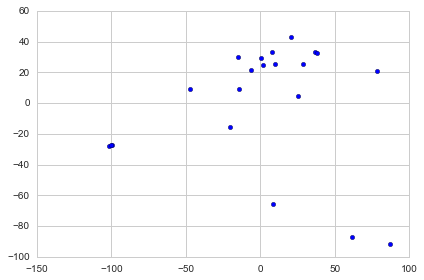

In [19]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed[0], smushed[1])

We could plot other components if we felt like it:

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


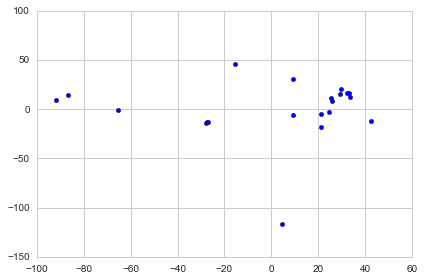

In [33]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the second ("1") and fourth ("3") components
ax.scatter(smushed[1], smushed[3])

Let's use a different color for mature and immature cells using a list comprehension. All [X11 color names](https://en.wikipedia.org/wiki/X11_color_names) are valid here. I also like [this](https://en.wikipedia.org/wiki/Web_colors#X11_color_names) list for looking up color names

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


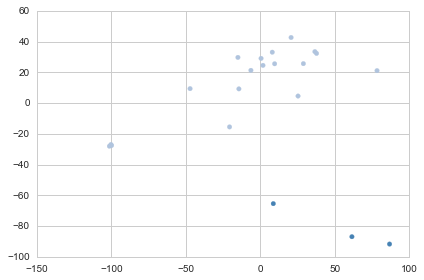

In [21]:
maturity_color = ['lightsteelblue' if x == 'immature' else 'steelblue' for x in shalek2013_metadata['maturity']]

# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed[0], smushed[1], color=maturity_color)

Hmm those points way to the left look strange .. is it because they are pooled? Let's add a black outline to the pooled samples. That means we'll have to plot them separately.

In [22]:
singles = shalek2013_metadata.query('pooled == False').index
singles

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18'],
      dtype='object')

In [23]:
pooled = shalek2013_metadata.query('pooled == True').index
pooled

Index(['P1', 'P2', 'P3'], dtype='object')

We'll use `.loc` notation to access the pooled and single rows separately.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


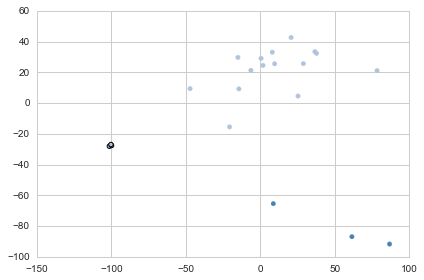

In [29]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color)
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, edgecolor='black', linewidth=1)

Hmmm it's hard to tell which ones have the outline so lets make the markers bigger with the argument `s=100`. "`s`" is short for "size." The default value is 20.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


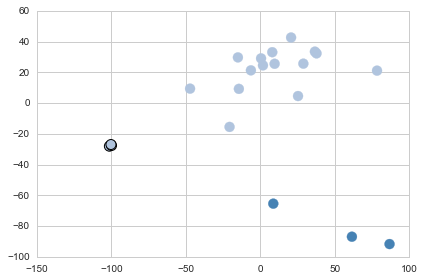

In [35]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color, s=100)
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, edgecolor='black', linewidth=1, s=100)

Let's add a nice legend too.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


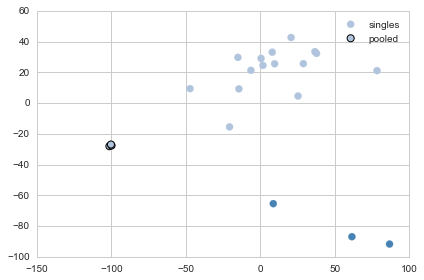

In [31]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color, s=50, label='singles')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, 
           edgecolor='black', linewidth=1, s=50, label='pooled')
ax.legend()

And label the x and y axes with the percentage explained variance.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


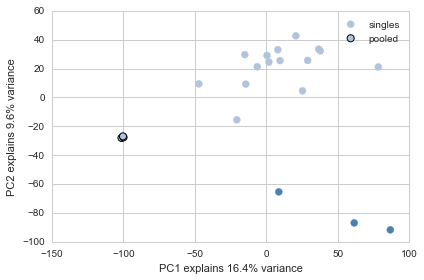

In [38]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()


# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color, s=50, label='singles')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, 
           edgecolor='black', linewidth=1, s=50, label='pooled')

xlabel = 'PC1 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[0])
ylabel = 'PC2 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[1])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.legend()

### Exercise 1

1. Try plotting other principal components in the last plot
    1. Do you need to change the x- and y-labels?
2. How does the explained variance ratio compare in the other components?
3. Try plotting only the pooled or single samples
1. Use ICA instead of PCA
    1. Compare different numbers of components

## Macaulay2016 data